# DSCI 573 lab 2

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

### General lab instructions

rubric={mechanics:3, writing:3}

- Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Ensure you respond to the questions using full English sentences that have proper spelling and grammar. 
- All the data for lab 2 lives in this directory: https://github.ubc.ca/ubc-mds-2017/DSCI_573_feat-model-select_students/tree/master/data/
    - _note - you will want to copy the relevant data from this directory into a data directory that you create in your lab2 repository and make sure all the data loads using relative paths_

### Exercise 1: regularized logistic regression

rubric={reasoning:10,code:10}

Here, we will explore logistic regression with L1 and L2 regularization. Use scikit-learn's [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to compare L1 and L2 regularization on the data set "logisticData.pkl".
In each case report the number of "selected features" and the validation error with $C = 1$ ($C$ is the reciprocal of the regularization parameter). Discuss your results.

Note: to determine if a feature was "selected" or not, check if the corresponding element of $w/\max(w)$ is above some small threshold like $10^{-6}$, where $w$ are the weights.

*Clarification on the discussion aspect: you are to compare the L1 and L2 regularization results with a common $C=1$ regularization parameter (for example, how do the coefficient estimates compare in both cases?).*

In [3]:
np.random.seed(0)

data = pd.read_pickle("logisticData.pkl")

C = 1e10

X = data['X']
y = data['y']

X_valid = data['Xvalidate']
y_valid = data['yvalidate']

X.shape

(500, 101)

**Answer** 


In [4]:
l1_model = LogisticRegression(penalty= 'l1')
l1_model.fit(X,y)

valid_l1 = l1_model.score(X_valid, y_valid)

l1_max_w = np.argmax(l1_model.coef_[0])

number_selected1 = len(np.where((abs(l1_model.coef_)/l1_max_w) >= 10e-6)[1])

print("The L1 regularization selects ", number_selected1, "elements. The validation score is ", valid_l1)

The L1 regularization selects  71 elements. The validation score is  0.948


In [5]:
l2_model = LogisticRegression(penalty= 'l2')
l2_model.fit(X,y)

valid_l2 = l2_model.score(X_valid, y_valid)

l2_max_w = max(l2_model.coef_[0])

number_selected2= len(np.where((abs(l2_model.coef_)/l2_max_w) >= 10e-6)[1])

print("The L2 regularization selects ", number_selected2, "elements. The validation score is ", valid_l2)

The L2 regularization selects  101 elements. The validation score is  0.926


* Observation 

Unsurprisingly, the L2 regularization selects all features. Generally, we know that L2 regularization does not set any weights to 0 - instead with increasing lambda (or $C$) weights are depreciated by a larger factor. This means, that we expect L2 to select all features but attribute each feature with a low weight. Further, we know that L1 regularization can set the weights for certain parameters to 0 and therefore effectively remove parameters from the model. In this case, L1 regularization lead to a model with 71 parameters.

This way, L1 regularization yields a simpler - more interpretable model - while also having a higher score (r-squared) on the validation set. Therefore, in this case L1 regularization is preferable. In general, we expect an L1-regularized model to be simpler while the performance of the two regularizations depends on the number of predictors and their weights. Here, we expect Ridge regression to perform better when we have many predictors, all with coefficients of
roughly equal size while lasso may perform better in a setting where a relatively small number of predictors
have large coefficients.  ("Introduction to Statistial Learning" p.224)

### Exercise 2: RBF and regularization

The code below loads a data set and performs kernel ridge regression (least squares with a kernel function and L2 regularization). It plots the result and prints out a performance metric. The performance of the model becomes better as the RBF parameter `gamma` is increased, but substantially overfits for very high values. We might expect to do better through the use of regularization. 

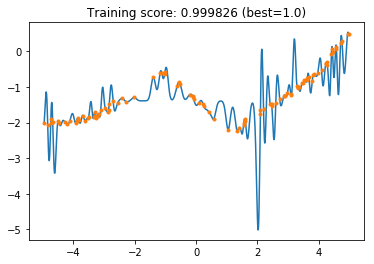

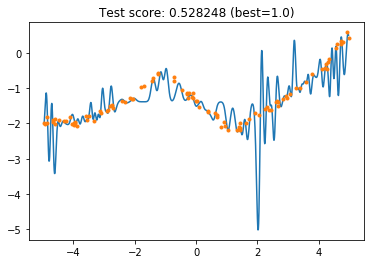

In [6]:
from sklearn.svm import SVR
# Note: we use SVR instead of sklearn.kernel_ridge.KernelRidge because KernelRidge 
# doesn't expose the regularization parameter
# But by setting epsilon=0 below, we basically reproduce the behavior of KernelRidge.

data = pd.read_pickle("nonLinearDataS.pkl")    
    
X = data['X'][:,None]
y = data['y']#[:,None]
Xtest = data['Xtest'][:,None]
ytest = data['ytest']#[:,None]

# note: larger gamma means more complexity; larger C means higher penalty for misclassification (less regularization)
kr = SVR(epsilon=0, kernel="rbf", gamma=100, C=1000)
kr.fit(X, y) 

grid = np.linspace(np.min(X),np.max(X),1000)[:,None]
grid_pred = kr.predict(grid)
plt.plot(grid, grid_pred)
plt.plot(X, y, '.')
plt.title("Training score: %f (best=1.0)" % kr.score(X, y))

plt.figure()
plt.plot(grid, grid_pred)
plt.plot(Xtest, ytest, '.')
plt.title("Test score: %f (best=1.0)" % kr.score(Xtest, ytest))

##### 2.1

rubric={reasoning:3,code:3,viz:3}

Explore whether you can achieve a lower test error by exploring different values of the regularization parameter $\lambda$ (in the code, we control this through the parameter `C`, which is $\frac{1}{\lambda}$). Try `C` in the range: $10^{-4},10^{-3},..., 10{^4}$.

**Answer**

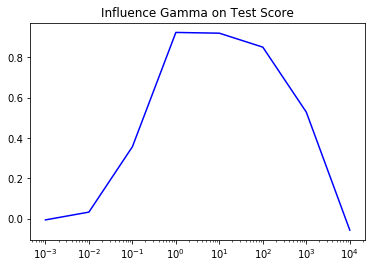

In [7]:
#iterating over different values of lambda and recording test_score

c_range = np.array([10e-4, 10e-3, 10e-2, 1, 10, 10**2, 10**3, 10**4])
index_list = []
score_list = []
for i in c_range:
    kr = SVR(epsilon=0, kernel="rbf", gamma=100, C=i)
    kr.fit(X, y) 
    score = kr.score(Xtest, ytest)
    score_list.append(score)
    index_list.append(i)  
    
plt.plot(index_list,score_list ,"b",kr.score(Xtest, ytest))
plt.title('Influence Gamma on Test Score')
plt.xscale('log')

##### 2.2

rubric={reasoning:4,code:4}

Unfortunately, this demo and exploring whether we can achieve a better test error by trying out different values of $\lambda$ is violating the golden rule of machine learning, by looking at the test set multiple times. Instead of training on the full training set and testing on the test set, train on the first half of the training data and test on the second half of the training data (the validation set). Compare the test error to the result from Exercise 3.1.

Then, try again but this time shuffling the data set first (or, equivalently, doing a random split). Are the results different?

**Answer**

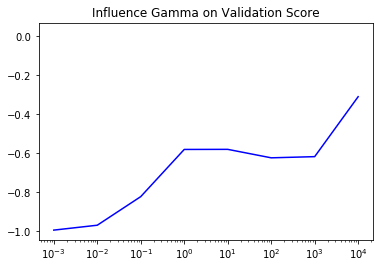

In [8]:
#splitting data in first and second half 
mid = len(X)//2

X_train1 = X[:mid]
y_train1 = y[:mid]

X_val1 = X[mid:]
y_val1 = y[mid:]

#training on first half, scoring on second half
c_range = np.array([10e-4, 10e-3, 10e-2, 1, 10, 10**2, 10**3, 10**4])

index_list = []
score_list = []
for i in c_range:
    kr = SVR(epsilon=0, kernel="rbf", gamma=100, C=i)
    kr.fit(X_train1, y_train1) 
    score = kr.score(X_val1, y_val1)
    score_list.append(score)
    index_list.append(i)

#plotting results 

plt.plot(index_list,score_list ,"b",kr.score(Xtest, ytest))
plt.title('Influence Gamma on Validation Score')
plt.xscale('log')

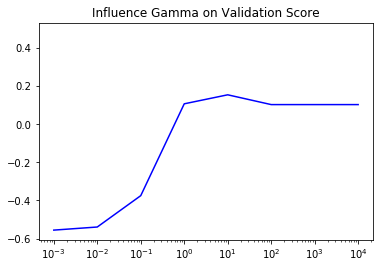

In [9]:
#using train_test_split to shuffle data and create split 

X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.5, random_state=1)


#training on first half, scoring on second half
c_range = np.array([10e-4, 10e-3, 10e-2, 1, 10, 10**2, 10**3, 10**4])

index_list = []
score_list = []
for i in c_range:
    kr = SVR(epsilon=0, kernel="rbf", gamma=100, C=i)
    kr.fit(X_train2, y_train2) 
    score = kr.score(X_val2, y_val2)
    score_list.append(score)
    index_list.append(i)
    
plt.plot(index_list,score_list ,"b",kr.score(Xtest, ytest))
plt.title('Influence Gamma on Validation Score')
plt.xscale('log')

* Observation: 

Based on the "illegal" test calibration on our test data (2.1), we know that models with a large `gamma` value rapidly overfit with gamma values greater than 100. The question now is, in how far we can estimate this real test error by using our training data. 

Using the validation error from our non-random split as a test-score estimate suggests that using very lage values of `gamma` would yield the best test score. Using the validation error from the random split gives a better approximation and would lead to an optimal `gamma` of ~1. 

##### 2.3

rubric={viz:4,code:4}

Search over the hyperparameters `gamma` and `C` and find a combination that performs the best on the validation set.  Once you have the best values of the hyperparameters `gamma` and `C`, train on the full training set and compute the performance score on the test set. Report the best values of `gamma` and `C` and the final test error estimate from this procedure. Also include a plot of the fit.

**Answer**

In [10]:
parameters = {"gamma" : [10**-7,10**-6, 10**-5,10**-4,10**-3,10**-2,10**-1,1., 10, 10**2, 10**3, 10**4], "C" : list(range(1,100,1)) }

svr = SVR(epsilon=0, kernel="rbf")
grid_search =  GridSearchCV(svr, parameters)
grid_search.fit(X_train2,y_train2)

print("The best parameters from grid search are: ", grid_search.best_params_)

The best parameters from grid search are:  {'C': 97, 'gamma': 0.1}


In [11]:
#using parameters to fit model

svr_best = SVR(epsilon = 0, kernel = "rbf", gamma = 0.1, C = 97)
svr_best.fit(X, y)

print("The performance on the test set using the ideal parameter combination above is: ", svr_best.score(Xtest, ytest))

The performance on the test set using the ideal parameter combination above is:  0.979683127018


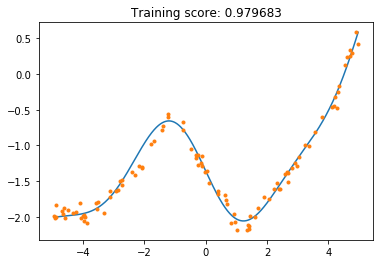

In [12]:
#creating plot 

grid = np.linspace(np.min(X),np.max(X),1000)[:,None]
grid_pred = svr_best.predict(grid)
plt.plot(grid, grid_pred)
plt.plot(Xtest, ytest, '.')
plt.title("Training score: %f" % svr_best.score(Xtest, ytest))

#### (optional) 2.4

rubric={reasoning:1}

In DSCI 571 you played around with the `C` and `gamma` parameters of the SVM. Are the interpretations of these parameters the same as here? You'll notice that the RBF makes an appearance in both cases. Write a couple sentences making a connection between these parameters with the same names appearing in two different contexts. 

## Exercise 3: ridge, lasso, elastic nets

rubric={reasoning:10,code:15}

In the `primeData` dataset, most of the variables are not relevant to the prediction. In particular, only the variables $j$, where $j$ is a prime number, are relevant.

The code below loads the data, fits a linear regression model, and computes the squared error on the training and validation sets. As you can see, the validation error is huge compared to the (tiny) training error. This model is clearly over-fitting.

Your tasks: 

- A linear model seems extremely simple, and yet it is overfitting. Write a few sentences explaining the intuition of what is going on here. 
- Fit an L2-regularized linear regression, a.k.a. Ridge regression, via scikit-learn's [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare them to the unregularized version.
- Fit an L1-regularized linear regression, a.k.a. Lasso regression, via scikit-learn's [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare them to your previous results.
- For this favorite `alpha` value, which of the coefficients (accessed via the `model.coef_` if `model` is your `Lasso` object) are nonzero? 
- Make a plot of the number of nonzero coefficients as a function of `alpha`. Does your plot make sense?
- Fit an L1- and L2-regularized linear regression, a.k.a. elastic net, via scikit-learn's [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare to your previous results.
- Finally, discuss the following: In lab 1, you did forward and (a variation of) backward feature selection on this same dataset. Discuss the results obtained from all 5 methods of feature selection on this dataset. Which worked best? Worst? Or were all the results essentially the same? Did you see what you would expect based on what you learned about these methods in lecture?

In [13]:
data = pd.read_pickle("primeData.pkl")      
    
X = data['X']
y = data['y']
Xvalidate = data['Xvalidate']
yvalidate = data['yvalidate']
    
n = X.shape[0]
d = X.shape[1]
t = Xvalidate.shape[0]

print("Number of training examples:", n)
print("Number of features:", d)

Number of training examples: 250
Number of features: 300


In [14]:
lm = LinearRegression()
lm.fit(X,y)

mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

print("Training error:", mean_squared_err(y, lm.predict(X)))
print("Validation error:", mean_squared_err(yvalidate, lm.predict(Xvalidate)))

Training error: 5.48080034238e-28
Validation error: 27.3590805707


0.30745242781648552

**Answer**

- A linear model seems extremely simple, and yet it is overfitting. Write a few sentences explaining the intuition of what is going on here. 

Linear models can have a very high variance - especially, when the distribution of the training data is close to linear and the training error is low (which it is given in this case). When this is the case, using the validation set - i.e. changing the data - slightly would result in a significantly different regression line which in turn means that our existing line does not fit the data very well. Therefore, although a linear model is appears simple it has a significant risk of overfitting. 

- Fit an L2-regularized linear regression, a.k.a. Ridge regression, via scikit-learn's [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare them to the unregularized version.

In [103]:
#tuning alpha parameter with gridsearch 

alpha_range = 10**np.arange(-5.0,10,1)
alpha_params = {"alpha" : alpha_range}


ridge_model = Ridge()
grid_search_a = GridSearchCV(ridge_model, alpha_params)
grid_search_a.fit(X,y)

print("The best parameters from grid search are: ", grid_search_a.best_params_["alpha"])

The best parameters from grid search are:  100000.0


In [104]:
#fitting model
best_ridge = Ridge(alpha = 1)
best_ridge.fit(X,y)

print("Training error:", mean_squared_err(y, best_ridge.predict(X)))
print("Validation error:", mean_squared_err(yvalidate, best_ridge.predict(Xvalidate)))

Training error: 1.25983090113e-10
Validation error: 27.5112127219


- Fit an L1-regularized linear regression, a.k.a. Lasso regression, via scikit-learn's [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare them to your previous results.

In [105]:
#tuning alpha parameter with gridsearch 

alpha_range = {"alpha" : np.arange(1,20,0.5)}

lasso_model = Lasso()
grid_search_l = GridSearchCV(lasso_model, alpha_range)
grid_search_l.fit(X,y)

lasso_model_best = Lasso(alpha=4)
lasso_model_best.fit(X,y)

print("The best parameters from grid search are: ", grid_search_l.best_params_)
print("Training error:", mean_squared_err(y, lasso_model_best.predict(X)))
print("Validation error:", mean_squared_err(yvalidate, lasso_model_best.predict(Xvalidate)))

The best parameters from grid search are:  {'alpha': 4.0}
Training error: 0.467558800298
Validation error: 2.52826119014


- For this favorite `alpha` value, which of the coefficients (accessed via the `model.coef_` if `model` is your `Lasso` object) are nonzero? 

In [106]:
lasso_model_best = Lasso(alpha = 4)
lasso_model_best.fit(X,y)

max_w = max(lasso_model_best.coef_)

number_selected_lasso = np.where((abs(lasso_model_best.coef_)/max_w) >= 10e-6)

print("the following 136 coefficiencts were not 0: \n" ,number_selected_lasso[0])


the following 136 coefficiencts were not 0: 
 [  0   1   2   3   5   8   9  11  15  19  21  26  27  29  31  34  35  36
  38  41  44  45  48  50  51  53  54  57  58  59  61  64  65  68  69  71
  76  77  84  89  90  95  96  98  99 100 101 103 105 106 107 111 112 114
 118 120 122 123 125 126 127 129 132 135 137 138 140 141 147 149 150 151
 156 157 160 161 162 164 165 166 168 171 173 176 177 178 179 186 187 189
 191 195 197 198 200 203 209 210 212 213 215 216 221 224 225 227 231 233
 237 239 243 245 249 250 254 255 257 258 261 265 267 269 272 273 275 276
 278 279 281 286 288 289 292 293 294 296]


- Make a plot of the number of nonzero coefficients as a function of `alpha`. Does your plot make sense?

C:\Users\Akleefel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


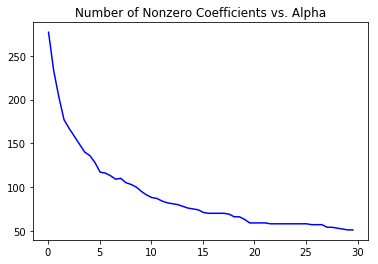

In [107]:
alpha_list = []
count_list = []
alpha_range = np.arange(0.05,30,0.5)

for i in alpha_range:
    
    lasso_model = Lasso(alpha = i)
    lasso_model.fit(X,y)

    max_w = max(lasso_model.coef_)
    number_selected = len(np.where((abs(lasso_model.coef_)/max_w) >= 10e-6)[0])
    count_list.append(number_selected)
    alpha_list.append(i)

plt.plot(alpha_list, count_list,"b")
plt.title('Number of Nonzero Coefficients vs. Alpha')

* Observation: 

The higher the value of `alpha` the more coefficients are not 0. This makes sense because at an alpha value of 0, we are essentially removing the l1 penalty and the results will be the same as in the linear regression (300 features). The more we increase the weight on the l1 penalty, the more we "force" our model to minimize parameter values - which can in the case of l1 regularization lead to an effective removal of a parameter from the model. 

- Fit an L1- and L2-regularized linear regression, a.k.a. elastic net, via scikit-learn's [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), to this data set. Try to tune the `alpha` parameter and report your best result. Then, compute the training and validation error, and compare to your previous results.

In [108]:
elastic_model = ElasticNet()
alphas = np.arange(1,15,0.5)
alphas_params = {"alpha":alphas}
grid_elastic = GridSearchCV(elastic_model, alphas_params)
grid_elastic.fit(X,y)

print("The best Alpha is ",grid_elastic.best_params_["alpha"])

The best Alpha is  7.5


In [109]:
#fitting model
best_elastic = ElasticNet(alpha = 7.5)
best_elastic.fit(X,y)

print("Training error:", mean_squared_err(y, best_elastic.predict(X)))
print("Validation error:", mean_squared_err(yvalidate, best_elastic.predict(Xvalidate))) 

Training error: 0.440879801312
Validation error: 2.52315076917


**Summary Table - Training & Validation Errors** 

|Model|Training Error|Test Error|
|----|----|----|
|Linear Regression|0|27.359|
|Ridge Regression|0|27.5112|
|Lasso Regression|0.4675|2.5282|
|Elsastic Net|0.44087|2.5231|









* Observation



- Finally, discuss the following: In lab 1, you did forward and (a variation of) backward feature selection on this same dataset. Discuss the results obtained from all 5 methods of feature selection on this dataset. Which worked best? Worst? Or were all the results essentially the same? Did you see what you would expect based on what you learned about these methods in lecture?

## Exercise 4: putting it all together - a mini-project!

rubric={mechanics:5,code:15,reasoning:15,writing:5,viz:5}

Here you are tasked to do a machine learning problem of your choice (within the guidelines specified below) which has a feature and model selection aspect. You will complete this analysis from beginning (downloading data) to end (communicating the results from your feature selection & machine learning problem). This will be done publicly on https://github.com/ and act as another piece of your growing portfolio. Expectations and constraints on dataset selection and project are outlined below:

#### Dataset selection:
Datasets are to be chosen from this repository: http://archive.ics.uci.edu/ml/datasets.html. They must also meet the following constraints:
   - number of observations should be > 300
   - number of features > 10
   - be a regression or classification problem (see "Default Task" column in repository linked to above)
   - *note: no sequential, time-series or nlp data can be used for this*

> *note - some files from this dataset repository are of `.arff` format. Below is some Python code to help you load such files:*
>
>```
from scipy.io import arff
import pandas as pd
data = arff.loadarff('dataset_path.arff')
df = pd.DataFrame(data[0])
df.head()
```

#### Project expectations:

1. All work should live in a well-organized, public repository on Github.com (and give it a more meaningful name than lab2...)
    - When submitting your work, tag a release (v1.0) and submit that URL in README of your lab2 Github.ubc.ca repository to point the TA's to your work
2. Have a clear README that:
    - summarizes what your project does 
    - explains how to run your analysis from beginning to end
    - lists all software dependencies
3. Write code in either a `.ipynb` or `.py` scripts that:
    - downloads the data
    - performs necessary data cleaning and wrangling
    - performs some EDA (creates **at least** one table and one visualization)
    - performs feature and model selection (you should create **at least** one table and one visualization to present these results)
4. Write a 1-2 page report (including tables, figures and references) in `.md`, `.Rmd` or `.ipynb` that presents your results. This report should:
    - be linked to in the README of your project's repo
    - be general enough that someone not familiar with your dataset understands what question you are asking and what your results mean
    - be technical enough that your MDS peers could easily understand what you did and why
    
#### Make your analysis automated and reproducible (optional)
rubric={mechanics:2}

- make it automated using Make
- make it reproducible using automated builds from Docker
- explain clearly in the README how the user would run your automated and reproducible analysis (i.e., the docker run command they would need to type) and don't forget to link to your Docker Hub repo so the user knows where the Dockerfile is (if they want to see it).
